# Meat Production Data Cleaning

## Preparing
**Remark:** run preparing's codes anyway, though some parts can run independently.

Classes

In [129]:
class ReadData():
    """
    # Usage:
    # df = ReadData(file_name, url).createDF() 
    """
    def __init__(self, file_name, 
                 url = None,
                 org_name = 'good-food', 
                 repo_name = 'datamap2019', 
                 folder_path = '/data/', 
                 mode = 'wb'
                ):
        
        self.file_name = file_name
        self.org_name = org_name
        self.repo_name = repo_name
        self.folder_path = folder_path
        
        self.url = url
        self.mode = mode
        
        self.root_path = 'https://github.com/'
        self.raw_path = 'https://raw.githubusercontent.com/'
        self.branch = 'master'

    def getPath(self):
        if self.url == None:
            path = self.root_path + self.org_name + '/' + self.repo_name + '/blob/' + self.branch + self.folder_path + self.file_name
            raw_path = self.raw_path + self.org_name + '/' + self.repo_name + '/' + self.branch + self.folder_path + self.file_name
            print('Url: ', path)
            print('Raw data:', raw_path)
        else:
            print('Url: ', self.url)
            print('Raw data:', self.url)
        return raw_path

    def curl(self):
        import urllib.request, urllib.parse, urllib.error
        
        url = self.getPath()
        response = urllib.request.urlopen(url).read()
        with open(self.file_name, self.mode) as file_handle:
            file_handle.write(response)

    def delFile(self):
        import os
        if os.path.exists(self.file_name): os.remove(self.file_name)
        else: print('no such file:%s'%self.file_name)

    def createDF(self):
        import pandas as pd
        import time
        print(self.file_name, 'is under dealing... needs 1 min')
        self.curl()
        time.sleep(10)
        df = pd.read_csv(self.file_name)
        self.delFile()
        return df

Libraries

In [2]:
import numpy as np
import pandas as pd

import urllib.request, urllib.parse, urllib.error
import re
import os
import time
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
%matplotlib inline

Some Settings

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',1000)

year_now = datetime.date.today().year
data_year = year_now-2

Define some functions data plot:

In [4]:
FIG_size=(6,16) # figure size

# font size
TIT_size = 14    # titles
LAB_size = 13    # labels
LEG_size = 13    # legends
TCK_size = 12    # ticklabels

LIN_wei = 2.5    # line weights
BAR_wid = 4      # bar width

CLs = ('darkgrey', 'r','b','y','c','g','m', 'k')    # clors
LSs = ('-', '--', ':', '-.', '-', '--', ':', '-.')  # linestyles

def setX_years(ax, ticks):
    ax.set_xticks(ticks)
    ax.set_xlim(ticks[0],ticks[-1])
    ax.set_xticklabels(ticks, rotation=45, ha='center', fontsize=TCK_size)
    ax.set_xlabel('Years', fontsize=LAB_size)
       
def setX_areas(ax, ticks):
    ax.set_xticklabels(ticks, rotation=90, ha='center', fontsize=TCK_size)
    ax.set_xlabel('Areas', fontsize=LAB_size)
    
def setY_num(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Number of Animals (10000 #)', fontsize=LAB_size)
    
def setY_wei(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Prods Weight (10000 t)', fontsize=LAB_size)
    
def setY_per(ax, ticks):
    ax.set_yticks(ticks)
    ax.set_ylim(ticks[0],ticks[-1])
    ax.set_yticklabels(ticks, fontsize=TCK_size)
    ax.set_ylabel('Percentage (%)', fontsize=LAB_size)

def setSpi_LB(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

## Reading and Checking Raw Data

Raw Data: 

In [5]:
# If you have not cloned the whole repository from  [Github](https://github.com/good-food/datamap2019)
# please use the next line in replace, remember to replace the argument with one path by imitating the following lines.
# df = ReadData(path).createDF()

# raw
stk_cn = pd.read_csv('./data/'+'product_livestock'+'_stock.csv')
prm_cn = pd.read_csv('./data/'+'product_livestock'+'_primary.csv')
lvs_ars_raw = pd.read_csv('./data/'+'product_livestock_areas'+'_raw.csv')
aqu_raw = pd.read_csv('./data/'+'product_aquatic'+'_raw.csv')

dfs_raw = (stk_cn, prm_cn, lvs_ars_raw, aqu_raw)

### Checking Data Updates
**Remark:** No need to run every time, 1 time a year is enough.

In [6]:
n=0
for df in dfs_raw:
    n+=1
    years = df['Year'].unique()
    years.sort()
    print('Year list of data No.{}  = {}'.format(n, years))

    year_newest = years.max()
    if year_newest == year_now-2:
        print("Tis data is already updated to year {}, the newest one.\n".format(year_now-2))
    else:
        print('The newest data is updated to year {}, while our data is updated to year{}'.format(year_now-2, year_newest))
print('If you want to update data, check README.md in this repository.')

Year list of data No.1  = [1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]
Tis data is already updated to year 2017, the newest one.

Year list of data No.2  = [1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017]
Tis data is already updated to year 2017, the newest one.

Year list of data No.3  = [1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017]
Tis data is already updated to year 2017, the newest one.

Year list of data No.4  = [1978 1980 1985 1986 198

### Checking Data Frame
**Remark:** No need to run every time, just run when you want to check it.

In [7]:
n=0
for df in dfs_raw:
    n+=1
    print('Data No.{}:'.format(n))
    print('shape = {}'.format(df.shape))
    print('columns list = {}'.format(df.columns.tolist()))
    display(df.head())

Data No.1:
shape = (798, 14)
columns list = ['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1961,1961,Head,7527000,NaN,Official data
1,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1962,1962,Head,6565000,NaN,Official data
2,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1963,1963,Head,6454000,NaN,Official data
3,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1964,1964,Head,6746000,NaN,Official data
4,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1965,1965,Head,7048000,NaN,Official data


Data No.2:
shape = (6515, 14)
columns list = ['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QL,Livestock Primary,41,"China, mainland",5313,Laying,1062,"Eggs, hen, in shell",1961,1961,1000 Head,390000.0,F,FAO estimate
1,QL,Livestock Primary,41,"China, mainland",5313,Laying,1062,"Eggs, hen, in shell",1962,1962,1000 Head,403000.0,F,FAO estimate
2,QL,Livestock Primary,41,"China, mainland",5313,Laying,1062,"Eggs, hen, in shell",1963,1963,1000 Head,390000.0,F,FAO estimate
3,QL,Livestock Primary,41,"China, mainland",5313,Laying,1062,"Eggs, hen, in shell",1964,1964,1000 Head,402000.0,F,FAO estimate
4,QL,Livestock Primary,41,"China, mainland",5313,Laying,1062,"Eggs, hen, in shell",1965,1965,1000 Head,410000.0,F,FAO estimate


Data No.3:
shape = (642, 30)
columns list = ['Area', 'Year', 'Stock, large animals', 'Stock, cattle', 'Stock, horse', 'Stock, donkey', 'Stock, mule', 'Stock, camel', 'Slaughtered, pig', 'Stock, pig', 'Stock, goat & sheep', 'Stock, goat', 'Stock, sheep', 'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds', 'Meat Production, livestocks', 'Meat Production, pig, cattle, goat & sheep', 'Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep', 'Milk Production, total', 'Milk Production, cow', 'Wool Production, sheep', 'Wool Production, sheep, fine', 'Wool Production, sheep, semi-fine', 'Wool Production, goat, thick', 'Wool Production, goat, cashmere', 'Egg Production, birds', 'Honey Production']


,Area,Year,"Stock, large animals","Stock, cattle","Stock, horse","Stock, donkey","Stock, mule","Stock, camel","Slaughtered, pig","Stock, pig","Stock, goat & sheep","Stock, goat","Stock, sheep","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds","Meat Production, livestocks","Meat Production, pig, cattle, goat & sheep","Meat Production, pig","Meat Production, cattle","Meat Production, goat & sheep","Milk Production, total","Milk Production, cow","Wool Production, sheep","Wool Production, sheep, fine","Wool Production, sheep, semi-fine","Wool Production, goat, thick","Wool Production, goat, cashmere","Egg Production, birds",Honey Production
0,"China, mainland",1996,13360.60,11031.80,871.50,944.40,478.00,34.90,41225.10,36283.60,23728.3000,12315.8000,11412.500,NaN,NaN,NaN,4595.400000,3694.700000,3158.000000,355.700000,181.000000,735.800000,629.40000,298102.0,121020.0,74099.0,35255.0,9585.00,1965.200,18.4000
1,"China, mainland",1997,14541.80,12175.70,891.20,952.80,480.60,35.00,46483.70,40034.80,25575.7000,13480.1000,12091.900,NaN,NaN,NaN,5268.700000,4249.900000,3596.300000,440.900000,212.800000,681.100000,601.10000,255059.0,116054.0,55683.0,25865.0,8626.00,1895.300,21.1000
2,"China, mainland",1998,14803.20,12441.90,898.10,955.80,473.90,33.50,50215.10,42256.30,26903.5000,14168.3000,12735.200,NaN,NaN,NaN,5723.800000,4598.200000,3883.700000,479.900000,234.600000,745.400000,662.90000,277545.0,115752.0,68775.0,31417.0,9799.00,2021.300,20.7000
3,"China, mainland",1999,15024.75,12698.34,891.41,934.77,467.27,32.96,51977.20,43144.20,27925.7700,14816.2600,13109.500,NaN,NaN,NaN,5949.000000,4762.300000,4005.600000,505.429400,251.264300,806.907300,717.59390,283152.0,114103.0,73700.0,31849.0,10179.65,2134.667,22.9907
4,"China, mainland",2000,15151.51,12866.34,876.58,922.73,453.03,32.62,52673.34,44681.54,29031.9007,15715.9277,13315.983,NaN,NaN,NaN,6125.353545,4838.193106,4031.429225,532.805585,273.958296,919.118908,827.43079,292502.0,117386.0,84921.0,33266.0,11057.00,2243.300,24.6000


Data No.4:
shape = (675, 18)
columns list = ['Area', 'Year', 'Aquatic, total', 'Marine, total', 'Marine, caught', 'Marine, farmed', 'Marine Fish', 'Marine Crustaceans', 'Marine Molluscs', 'Marine Plants', 'Marine, others', 'Freshwater, total', 'Freshwater, caught', 'Freshwater, farmed', 'Freshwater Fish', 'Freshwater Crustaceans', 'Freshwater Molluscs', 'Freshwater, others']


,Area,Year,"Aquatic, total","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,CNFC,1998,27.4100,27.4100,27.4100,0.0,25.1100,0.2000,0.1000,0.0,2.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CNFC,1999,18.3000,18.3000,18.3000,0.0,9.5100,0.3200,8.4700,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CNFC,2000,17.5823,17.5823,17.5823,0.0,7.7602,0.2194,9.6027,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CNFC,2001,18.2977,18.2977,18.2977,0.0,8.9539,0.2250,9.1188,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CNFC,2002,18.2177,18.2177,18.2177,NaN,9.6000,0.1000,NaN,NaN,8.4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# First Glance at China's National Animal Production

## Data Outline

Merge Live Animals' Stock Data and Primary Data From FAO as China's National Product Data of Livestocks

In [8]:
display(stk_cn.groupby(['Element','Item']).head())
display(prm_cn.groupby(['Element','Item']).head())

Domain Code  Domain  Area Code  Area  \
Element Item                                                           
Stocks  Asses                            57      57         57    57   
        Beehives                         57      57         57    57   
        Buffaloes                        57      57         57    57   
        Camels                           57      57         57    57   
        Cattle                           57      57         57    57   
        Chickens                         57      57         57    57   
        Ducks                            57      57         57    57   
        Geese and guinea fowls           57      57         57    57   
        Goats                            57      57         57    57   
        Horses                           57      57         57    57   
        Mules                            57      57         57    57   
        Pigs                             57      57         57    57   
        Rabbits and hares                57      57         57    57   
        Sheep                            57      57         57    57   

                                Element Code  Item Code  Year Code  Year  \
Element Item                                                               
Stocks  Asses                             57         57         57    57   
        Beehives                          57         57         57    57   
        Buffaloes                         57         57         57    57   
        Camels                            57         57         57    57   
        Cattle                            57         57         57    57   
        Chickens                          57         57         57    57   
        Ducks                             57         57         57    57   
        Geese and guinea fowls            57         57         57    57   
        Goats                             57         57         57    57   
        Horses                            57         57         57    57   
        Mules                             57         57         57    57   
        Pigs                              57         57         57    57   
        Rabbits and hares                 57         57         57    57   
        Sheep                             57         57         57    57   

                                Unit  Value  Flag  Flag Description  
Element Item                                                         
Stocks  Asses                     57     57     4                57  
        Beehives                  57     57    45                57  
        Buffaloes                 57     57    28                57  
        Camels                    57     57     4                57  
        Cattle                    57     57    30                57  
        Chickens                  57     57    55                57  
        Ducks                     57     57    55                57  
        Geese and guinea fowls    57     57    55                57  
        Goats                     57     57     7                57  
        Horses                    57     57     4                57  
        Mules                     57     57     4                57  
        Pigs                      57     57     3                57  
        Rabbits and hares         57     57    45                57  
        Sheep                     57     57     7                57

Domain Code  \
Element                       Item                                               
Laying                        Eggs, hen, in shell                           57   
Milk Animals                  Milk, whole fresh buffalo                     57   
                              Milk, whole fresh camel                       57   
                              Milk, whole fresh cow                         57   
                              Milk, whole fresh goat                        57   
                              Milk, whole fresh sheep                       57   
Prod Popultn                  Honey, natural                                57   
Producing Animals/Slaughtered Hides, buffalo, fresh                         53   
                              Hides, cattle, fresh                          53   
                              Meat, ass                                     57   
                              Meat, buffalo                                 57   
                              Meat, camel                                   57   
                              Meat, cattle                                  57   
                              Meat, chicken                                 57   
                              Meat, duck                                    57   
                              Meat, goat                                    57   
                              Meat, goose and guinea fowl                   57   
                              Meat, horse                                   57   
                              Meat, mule                                    57   
                              Meat, pig                                     57   
                              Meat, rabbit                                  57   
                              Meat, sheep                                   57   
                              Skins, goat, fresh                            53   
                              Skins, sheep, fresh                           53   
Production                    Eggs, hen, in shell                           57   
                              Eggs, hen, in shell (number)                  57   
                              Eggs, other bird, in shell                    57   
                              Eggs, other bird, in shell (number)           57   
                              Hides, buffalo, fresh                         53   
                              Hides, cattle, fresh                          53   
                              Honey, natural                                57   
                              Meat indigenous, ass                         106   
                              Meat indigenous, buffalo                     106   
                              Meat indigenous, camel                       106   
                              Meat indigenous, cattle                      106   
                              Meat indigenous, chicken                     106   
                              Meat indigenous, duck                        106   
                              Meat indigenous, geese                       106   
                              Meat indigenous, goat                        106   
                              Meat indigenous, horse                       106   
                              Meat indigenous, mule                        106   
                              Meat indigenous, pig                         106   
                              Meat indigenous, rabbit                      106   
                              Meat indigenous, sheep                       106   
                              Meat, ass                                     57   
                              Meat, buffalo                                 57   
                              Meat, camel                                   57   
                              Meat, cattle       

In [9]:
lvs_cn_raw = pd.concat([stk_cn, prm_cn],join='outer')
print('shape of lvs_cn_raw is {}\nshape of stk_cn is {}\nshape of prm_cn is {}'.format(lvs_cn_raw.shape, stk_cn.shape, prm_cn.shape))
display(lvs_cn_raw.head())

shape of lvs_cn_raw is (7313, 14)
shape of stk_cn is (798, 14)
shape of prm_cn is (6515, 14)


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1961,1961,Head,7527000.0,NaN,Official data
1,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1962,1962,Head,6565000.0,NaN,Official data
2,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1963,1963,Head,6454000.0,NaN,Official data
3,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1964,1964,Head,6746000.0,NaN,Official data
4,QA,Live Animals,41,"China, mainland",5111,Stocks,1107,Asses,1965,1965,Head,7048000.0,NaN,Official data


In [10]:
lvs_cn_raw.drop(columns = ['Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Year Code', 'Flag'], inplace=True)
lvs_cn = lvs_cn_raw.dropna()
lvs_cn = lvs_cn[~(lvs_cn == 0).any(axis=1)]
print("Shape of China's National Product Raw Data of Livestocks", lvs_cn.shape)
display(lvs_cn.head())

Shape of China's National Product Raw Data of Livestocks (7261, 8)


,Domain,Area,Element,Item,Year,Unit,Value,Flag Description
0,Live Animals,"China, mainland",Stocks,Asses,1961,Head,7527000.0,Official data
1,Live Animals,"China, mainland",Stocks,Asses,1962,Head,6565000.0,Official data
2,Live Animals,"China, mainland",Stocks,Asses,1963,Head,6454000.0,Official data
3,Live Animals,"China, mainland",Stocks,Asses,1964,Head,6746000.0,Official data
4,Live Animals,"China, mainland",Stocks,Asses,1965,Head,7048000.0,Official data


In [11]:
# Break Point - China's National Product Raw Data of Livestocks has saved
lvs_cn.to_csv('./data/'+'product_livestock_cn'+'_temp.csv', index=False)

## Select Elements and Items that Have Completed Records

### Select top elements by counting records.

In [12]:
lvs_cn = pd.read_csv('./data/'+'product_livestock_cn'+'_temp.csv')

print("Shape of China's National Product Data of Livestocks BEFORE selecting main records:", lvs_cn.shape)
display(lvs_cn.groupby('Element').count())

lvs_cn = lvs_cn[lvs_cn['Element'].isin(['Stocks', 'Producing Animals/Slaughtered', 'Production', 'Yield/Carcass Weight'])]

print("Shape of China's National Product Data of Livestocks AFTER selecting main records:", lvs_cn.shape)
display(lvs_cn.groupby('Element').count())

Shape of China's National Product Data of Livestocks BEFORE selecting main records: (7261, 8)


,Domain,Area,Item,Year,Unit,Value,Flag Description
Element,,,,,,,
Laying,57,57,57,57,57,57,57
Milk Animals,285,285,285,285,285,285,285
Prod Popultn,57,57,57,57,57,57,57
Producing Animals/Slaughtered,953,953,953,953,953,953,953
Production,3070,3070,3070,3070,3070,3070,3070
Stocks,798,798,798,798,798,798,798
Yield,611,611,611,611,611,611,611
Yield/Carcass Weight,1430,1430,1430,1430,1430,1430,1430


Shape of China's National Product Data of Livestocks AFTER selecting main records: (6251, 8)


,Domain,Area,Item,Year,Unit,Value,Flag Description
Element,,,,,,,
Producing Animals/Slaughtered,953,953,953,953,953,953,953
Production,3070,3070,3070,3070,3070,3070,3070
Stocks,798,798,798,798,798,798,798
Yield/Carcass Weight,1430,1430,1430,1430,1430,1430,1430


### Select main items that have fully records by counting

In [13]:
print("Shape of China's National Product Data of Livestocks BEFORE selecting fully recorded records:", lvs_cn.shape)
display(lvs_cn.groupby(['Element', 'Item']).count())

lrg_st=['Cattle', 'Camels', 'Horses']
mid_st=['Pigs', 'Sheep', 'Goats']
brd_st=['Chickens', 'Ducks', 'Geese and guinea fowls']

lrg_mt=['Meat, cattle', 'Meat, camel', 'Meat, horse']
mid_mt=['Meat, pig', 'Meat, sheep', 'Meat, goat']
brd_mt=['Meat, chicken', 'Meat, duck', 'Meat, goose and guinea fowl']

egg=['Eggs, hen, in shell', 'Eggs, other bird, in shell']
mlk=['Milk, whole fresh cow','Milk, whole fresh camel','Milk, whole fresh sheep','Milk, whole fresh goat']

lvs_cn = lvs_cn.loc[lvs_cn['Item'].isin(lrg_st+mid_st+brd_st + lrg_mt+mid_mt+brd_mt + egg+mlk)]

print("Shape of China's National Product Data of Livestocks AFTER selecting fully recorded records:", lvs_cn.shape)
display(lvs_cn.groupby(['Element', 'Item']).count())

Shape of China's National Product Data of Livestocks BEFORE selecting fully recorded records: (6251, 8)


Domain  \
Element                       Item                                          
Producing Animals/Slaughtered Hides, buffalo, fresh                    53   
                              Hides, cattle, fresh                     53   
                              Meat, ass                                57   
                              Meat, buffalo                            57   
                              Meat, camel                              57   
                              Meat, cattle                             57   
                              Meat, chicken                            57   
                              Meat, duck                               57   
                              Meat, goat                               57   
                              Meat, goose and guinea fowl              57   
                              Meat, horse                              57   
                              Meat, mule                               57   
                              Meat, pig                                57   
                              Meat, rabbit                             57   
                              Meat, sheep                              57   
                              Skins, goat, fresh                       53   
                              Skins, sheep, fresh                      53   
Production                    Eggs, hen, in shell                      57   
                              Eggs, hen, in shell (number)             57   
                              Eggs, other bird, in shell               57   
                              Eggs, other bird, in shell (number)      57   
                              Hides, buffalo, fresh                    53   
                              Hides, cattle, fresh                     53   
                              Honey, natural                           57   
                              Meat indigenous, ass                    106   
                              Meat indigenous, buffalo                106   
                              Meat indigenous, camel                  106   
                              Meat indigenous, cattle                 106   
                              Meat indigenous, chicken                106   
                              Meat indigenous, duck                   106   
                              Meat indigenous, geese                  106   
                              Meat indigenous, goat                   106   
                              Meat indigenous, horse                  106   
                              Meat indigenous, mule                   106   
                              Meat indigenous, pig                    106   
                              Meat indigenous, rabbit                 106   
                              Meat indigenous, sheep                  106   
                              Meat, ass                                57   
                              Meat, buffalo                            57   
                              Meat, camel                              57   
                              Meat, cattle                             57   
                              Meat, chicken                            57   
                              Meat, duck                               57   
                              Meat, goat                               57   
                              Meat, goose and guinea fowl              57   
                              Meat, horse                              57   
                              Meat, mule                               57   
                              Meat, nes                                57   
                              Meat, pig                                57   
                              Meat, rabbit                             57   
                              Meat, sheep                      

Shape of China's National Product Data of Livestocks AFTER selecting fully recorded records: (2394, 8)


Domain  Area  Year  \
Element                       Item                                              
Producing Animals/Slaughtered Meat, camel                      57    57    57   
                              Meat, cattle                     57    57    57   
                              Meat, chicken                    57    57    57   
                              Meat, duck                       57    57    57   
                              Meat, goat                       57    57    57   
                              Meat, goose and guinea fowl      57    57    57   
                              Meat, horse                      57    57    57   
                              Meat, pig                        57    57    57   
                              Meat, sheep                      57    57    57   
Production                    Eggs, hen, in shell              57    57    57   
                              Eggs, other bird, in shell       57    57    57   
                              Meat, camel                      57    57    57   
                              Meat, cattle                     57    57    57   
                              Meat, chicken                    57    57    57   
                              Meat, duck                       57    57    57   
                              Meat, goat                       57    57    57   
                              Meat, goose and guinea fowl      57    57    57   
                              Meat, horse                      57    57    57   
                              Meat, pig                        57    57    57   
                              Meat, sheep                      57    57    57   
                              Milk, whole fresh camel          57    57    57   
                              Milk, whole fresh cow            57    57    57   
                              Milk, whole fresh goat           57    57    57   
                              Milk, whole fresh sheep          57    57    57   
Stocks                        Camels                           57    57    57   
                              Cattle                           57    57    57   
                              Chickens                         57    57    57   
                              Ducks                            57    57    57   
                              Geese and guinea fowls           57    57    57   
                              Goats                            57    57    57   
                              Horses                           57    57    57   
                              Pigs                             57    57    57   
                              Sheep                            57    57    57   
Yield/Carcass Weight          Meat, camel                      57    57    57   
                              Meat, cattle                     57    57    57   
                              Meat, chicken                    57    57    57   
                              Meat, duck                       57    57    57   
                              Meat, goat                       57    57    57   
                              Meat, goose and guinea fowl      57    57    57   
                              Meat, horse                      57    57    57   
                              Meat, pig                        57    57    57   
                              Meat, sheep                      57    57    57   

                                                           Unit  Value  \
Element                       Item                                       
Producing Animals/Slaughtered Meat, camel                    57     57   
                              Meat, cattle                   57     57   
                              Meat, chicken                  57     57   
                              Meat, duck                     57     57   
                              Meat, goat          

## Uniform Units

In [14]:
# print('Units BEFORE uniform')
# display(lvs_cn.groupby(['Element', 'Unit']).count())

lvs_cn.loc[lvs_cn['Unit'] =='Head','Value']=lvs_cn['Value']/10000
lvs_cn.loc[lvs_cn['Unit']=='Head', 'Unit']= '10000 Head'

lvs_cn.loc[lvs_cn['Unit'] =='1000 Head','Value']=lvs_cn['Value']/10
lvs_cn.loc[lvs_cn['Unit']=='1000 Head', 'Unit']= '10000 Head'

lvs_cn.loc[lvs_cn['Unit'] =='tonnes','Value']=lvs_cn['Value']/10000
lvs_cn.loc[lvs_cn['Unit']=='tonnes', 'Unit']= '10000 tonnes'

lvs_cn.loc[lvs_cn['Unit'] =='hg/An','Value']=lvs_cn['Value']/10
lvs_cn.loc[lvs_cn['Unit']=='hg/An', 'Unit']= 'kg/An'

lvs_cn.loc[lvs_cn['Unit'] =='0.1g/An','Value']=lvs_cn['Value']/10000
lvs_cn.loc[lvs_cn['Unit']=='0.1g/An', 'Unit']= 'kg/An'

print('Units AFTER uniform')
display(lvs_cn.groupby(['Element', 'Unit']).count())

Units AFTER uniform


,,Domain,Area,Item,Year,Value,Flag Description
Element,Unit,,,,,,
Producing Animals/Slaughtered,10000 Head,513,513,513,513,513,513
Production,10000 tonnes,855,855,855,855,855,855
Stocks,10000 Head,513,513,513,513,513,513
Yield/Carcass Weight,kg/An,513,513,513,513,513,513


In [15]:
# Break Point - China's National Product Data of Livestocks after selecting main records.
lvs_cn.to_csv('./data/'+'product_livestock_cn'+'_temp.csv', index=False)

## Explore Data for a Further Data Selection

In [16]:
lvs_cn = pd.read_csv('./data/'+'product_livestock_cn'+'_temp.csv')

# years for ploting charts
years = list(range(1965,2020,5))
Xs = range(1960, 2025, 5)

def plotLine(dfs, items):
    for n in range(0, len(items)):
        dfs[items[n]].plot.line(x='Year', c=CLs[n], ls=LSs[n], lw=LIN_wei, ax=ax0)
    
    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)
    
def plotBar(dfs, items):
    plt.bar(years, np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value']),color=CLs[0], width=BAR_wid)
    bot=np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value'])
    for n in range(1, len(items)):
        plt.bar(years, np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value']),bottom=bot,color=CLs[n], width=BAR_wid)
        bot=bot + np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])

    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
           bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)
    
    return bot

def plotStackBar(dfs, items):
    year_total
    plt.bar(years, np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value'])/year_total,color=CLs[0], width=BAR_wid)
    bot=np.array(dfs[items[0]][dfs[items[0]]['Year'].isin(years)]['Value'])/year_total
    for n in range(1, len(items)):
        plt.bar(years, np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])/year_total,bottom=bot,color=CLs[n], width=BAR_wid)
        bot=bot + np.array(dfs[items[n]][dfs[items[n]]['Year'].isin(years)]['Value'])/year_total
    
    ax=plt.gca()
    ax.legend(labels=list(items), loc='center left', frameon=False, fontsize=LEG_size,
               bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
    setSpi_LB(ax)
    setX_years(ax, Xs)

### Animal Stocks

In [17]:
# animals we' chosen for this part as mentioned above
lrg_st=['Cattle', 'Camels', 'Horses']
mid_st=['Pigs', 'Sheep', 'Goats']
brd_st=['Chickens', 'Ducks', 'Geese and guinea fowls']

# data frame for this part
st = lvs_cn[(lvs_cn['Element']=='Stocks')][['Year','Item','Value']]

#### Large Animal Stocks

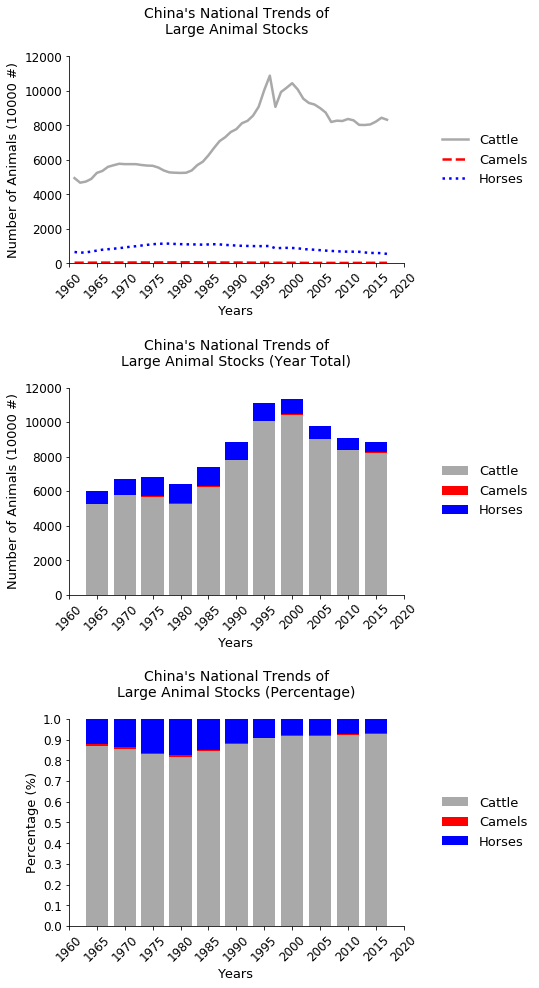

In [18]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Large Animal Stocks'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = lrg_st
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = st[st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

# ------------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 14000, 2000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 14000, 2000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Pig, Goat and Sheep Stocks

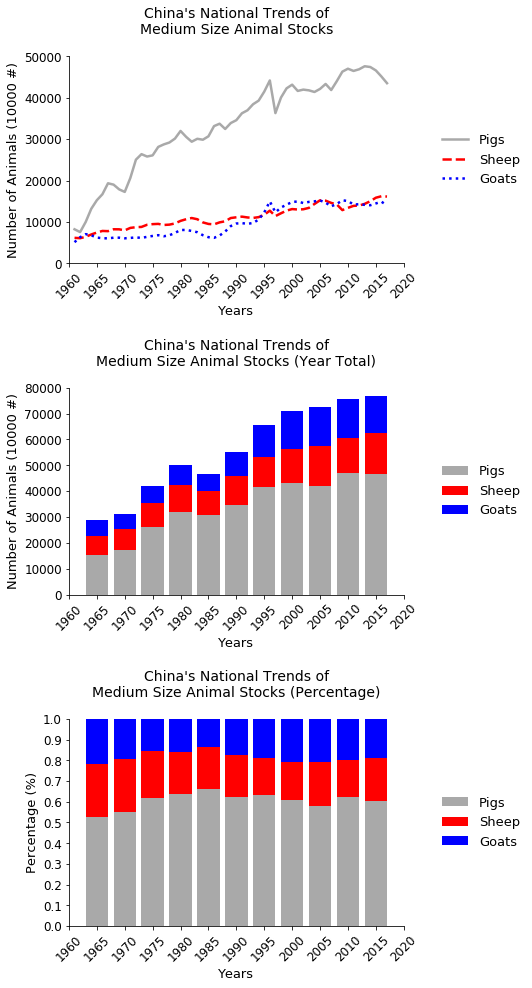

In [19]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Medium Size Animal Stocks'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = mid_st
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = st[st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 60000, 10000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 90000, 10000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Birds Stocks

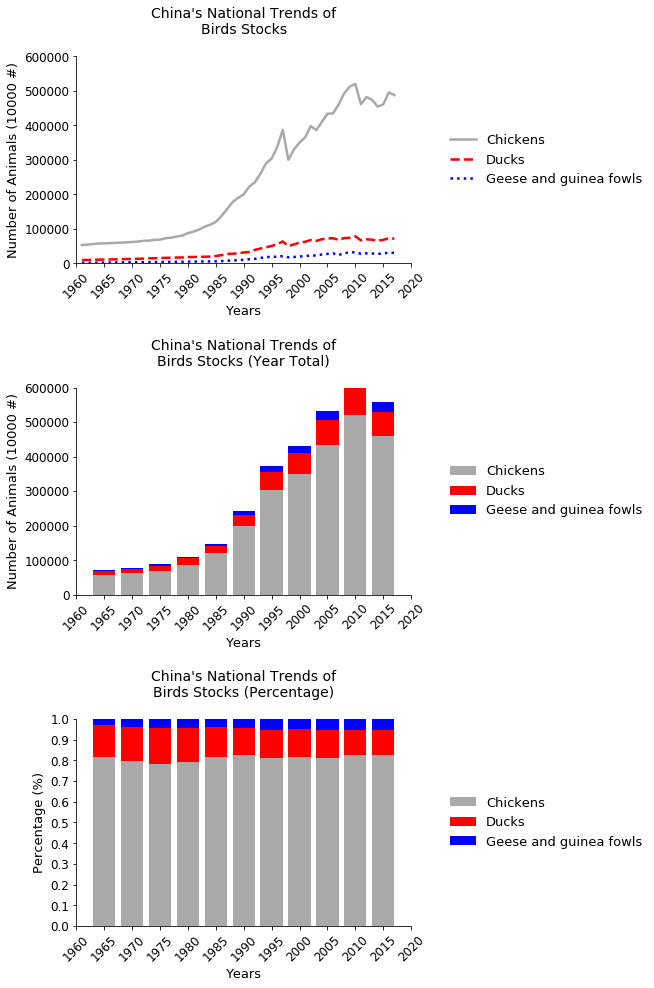

In [20]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Birds Stocks'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = brd_st
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = st[st['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 700000, 100000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 700000, 100000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

### Slaughtered Animals

In [21]:
lrg_mt=['Meat, cattle', 'Meat, camel', 'Meat, horse']
mid_mt=['Meat, pig', 'Meat, sheep', 'Meat, goat']
brd_mt=['Meat, chicken', 'Meat, duck', 'Meat, goose and guinea fowl']

sl=lvs_cn[(lvs_cn['Element']=='Producing Animals/Slaughtered')][['Year','Item','Value']]

#### Slaughtered Large Animals

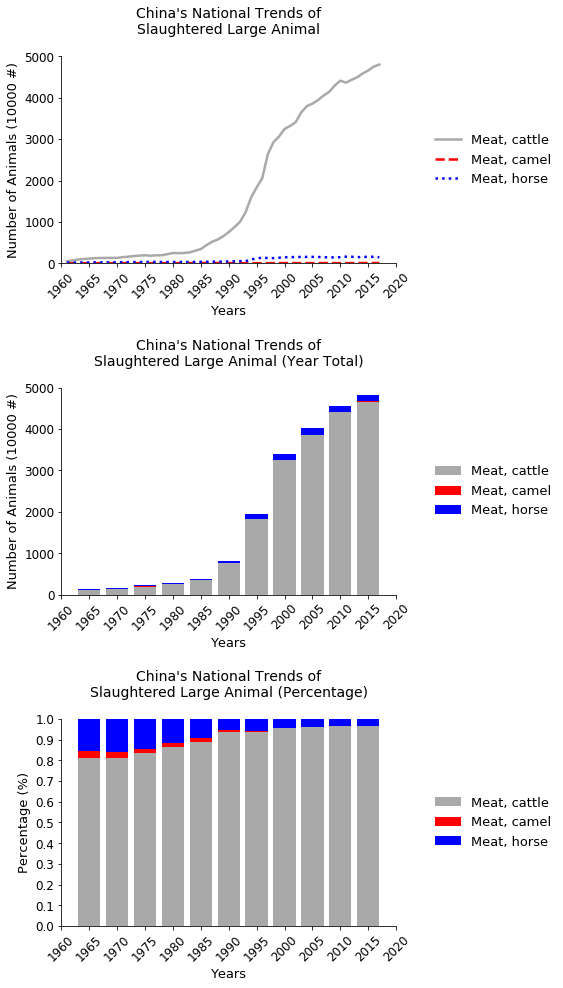

In [22]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Slaughtered Large Animal'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = lrg_mt
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = sl[sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)

    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 6000, 1000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 6000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Slaughtered Medium Size Animals

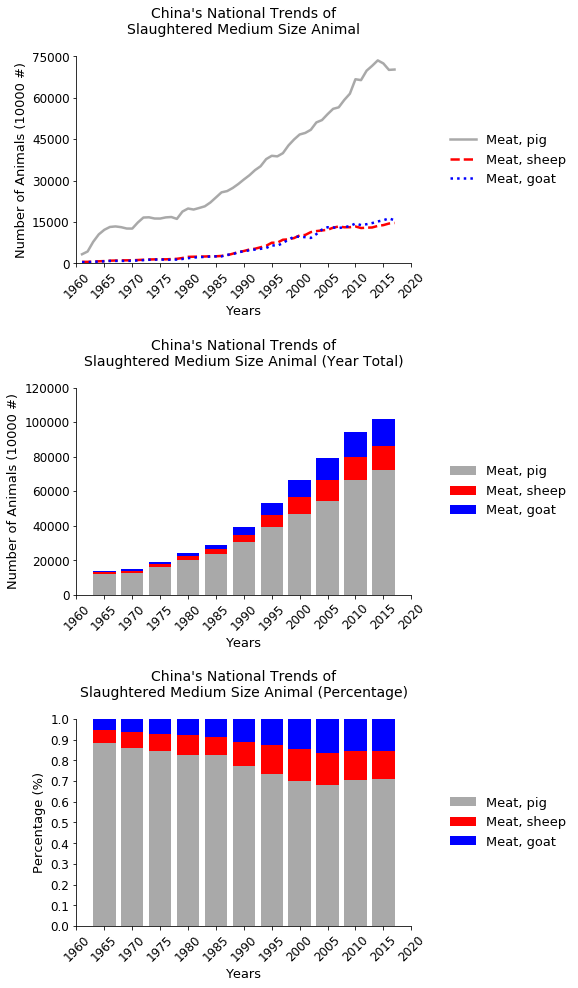

In [23]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Slaughtered Medium Size Animal'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = mid_mt
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = sl[sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
    
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 90000, 15000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 140000, 20000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Slaughtered Birds

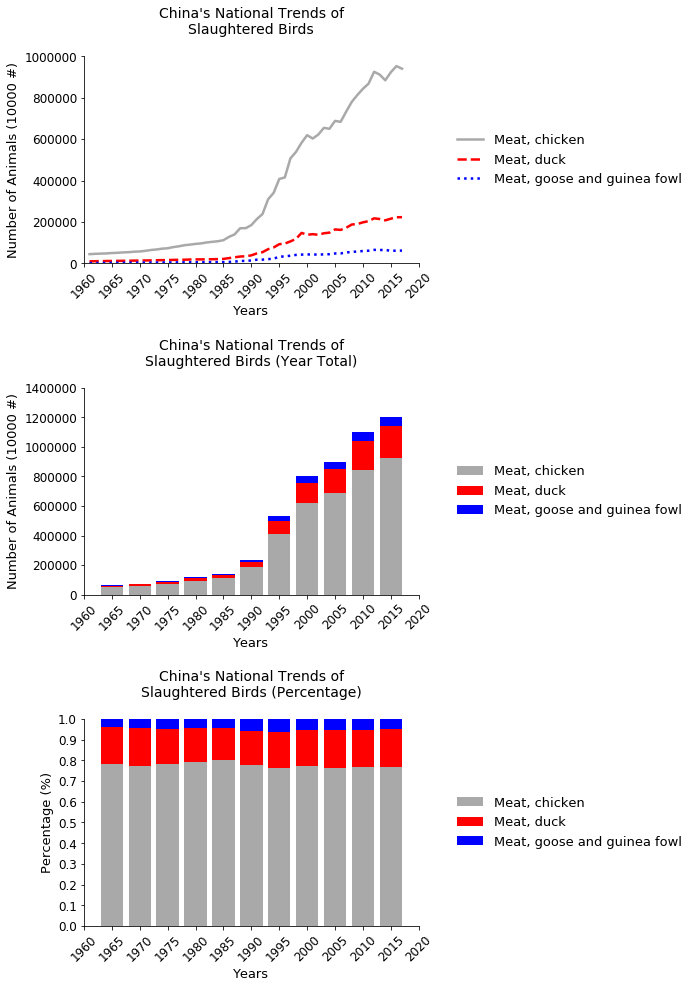

In [24]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Slaughtered Birds'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = brd_mt
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = sl[sl['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_num(ax0, range(0, 1200000, 200000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_num(ax1, range(0, 1600000, 200000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

### Production of Animal Products

After Exploring the Stocks and Slaughtered animals, we know that the main kinds of animals for animal products include: Cattles, Goats, Sheep, Pigs, Chickens, and ducks, because The sum of the number of these animal stocks or the number of slaughters exceeds 90% of those of the equivalent body size.

So, the main kind of animal production should include: meat of cattle, meat of goat, meat of sheep, meat of pig, meat of chicken, and meat of duck, egg from hen and other birds, and cow milk.

In [25]:
meat_pr = ['Meat, cattle', 'Meat, sheep', 'Meat, goat', 'Meat, pig', 'Meat, chicken', 'Meat, duck']
egg_mlk=['Eggs, hen, in shell', 'Eggs, other bird, in shell','Milk, whole fresh cow']

prod = lvs_cn[(lvs_cn['Element']=='Production')][['Year','Item','Value']]

#### Productions of Animal Meat

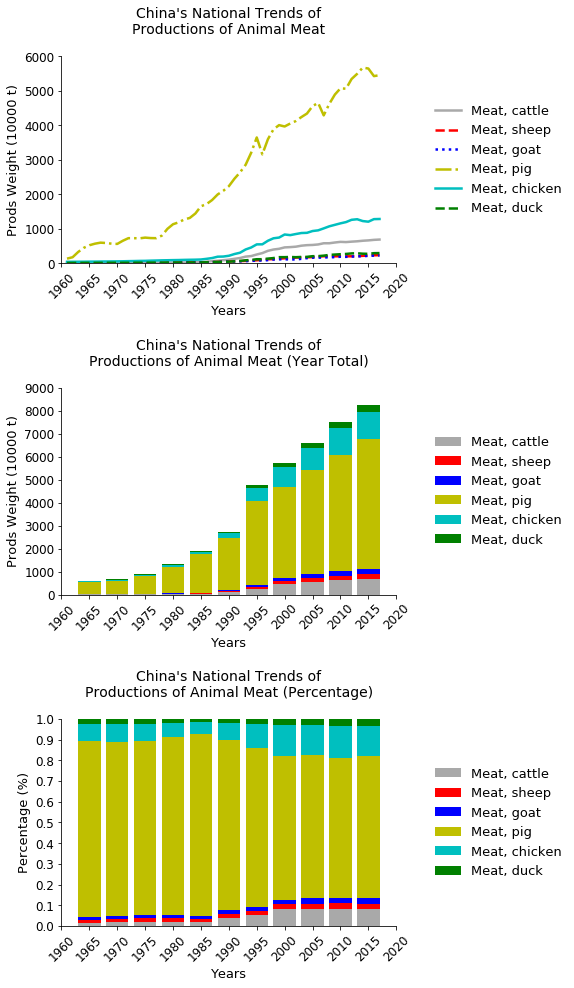

In [26]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Productions of Animal Meat'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = meat_pr
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = prod[prod['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_wei(ax0, range(0, 7000, 1000))

ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_wei(ax1, range(0, 10000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

#### Production of Birds Egg and Cow Milk

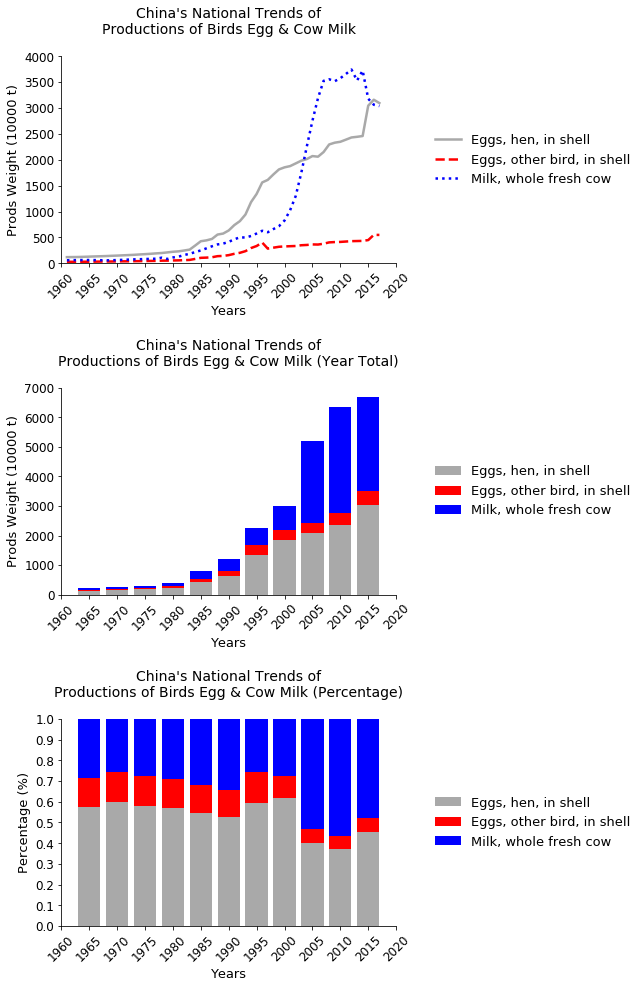

In [27]:
fig = plt.figure(figsize = FIG_size)
fig.tight_layout()                        
plt.subplots_adjust(wspace=0., hspace =0.6)

title = 'Productions of Birds Egg & Cow Milk'
title1 = "China's National Trends of\n"+title+"\n"
title2 = "China's National Trends of\n"+title+" (Year Total)\n"
title3 = "China's National Trends of\n"+title+" (Percentage)\n"

items = egg_mlk
dfs = {}
for n in range(0, len(items)):
    dfs[items[n]] = prod[prod['Item']==items[n]].sort_values(['Year'], ascending=True, axis=0)
# -------------------------------------------------------------------------------------------
ax0 = fig.add_subplot(3,1,1)
plt.title(title1, fontsize=TIT_size)
plotLine(dfs, items)
setY_wei(ax0, range(0, 4500, 500))


ax1 = fig.add_subplot(3,1,2)
plt.title(title2, fontsize=TIT_size)
year_total=plotBar(dfs, items)
setY_wei(ax1, range(0, 8000, 1000))

ax2 = fig.add_subplot(3,1,3)
plt.title(title3, fontsize=TIT_size)
plotStackBar(dfs, items)
setY_per(ax2, np.round(np.linspace(0.00, 1.00, num=11, endpoint=True), decimals=2))

plt.show()

## Clean Data Further

In [28]:
stocks = ['Cattle', 'Goats', 'Sheep', 'Pigs', 'Chickens', 'Ducks']
meat=['Meat, cattle', 'Meat, goat', 'Meat, sheep', 'Meat, pig', 'Meat, chicken', 'Meat, duck']
egg_mlk=['Eggs, hen, in shell', 'Eggs, other bird, in shell', 'Milk, whole fresh cow']

lvs_cn = lvs_cn[lvs_cn['Item'].isin(stocks+meat+egg_mlk)]

print("Shape of China's National Product Data of Livestocks after feature selecting:", lvs_cn.shape)
display(lvs_cn.groupby(['Element', 'Item']).count())

Shape of China's National Product Data of Livestocks after feature selecting: (1539, 8)


Domain  Area  Year  \
Element                       Item                                             
Producing Animals/Slaughtered Meat, cattle                    57    57    57   
                              Meat, chicken                   57    57    57   
                              Meat, duck                      57    57    57   
                              Meat, goat                      57    57    57   
                              Meat, pig                       57    57    57   
                              Meat, sheep                     57    57    57   
Production                    Eggs, hen, in shell             57    57    57   
                              Eggs, other bird, in shell      57    57    57   
                              Meat, cattle                    57    57    57   
                              Meat, chicken                   57    57    57   
                              Meat, duck                      57    57    57   
                              Meat, goat                      57    57    57   
                              Meat, pig                       57    57    57   
                              Meat, sheep                     57    57    57   
                              Milk, whole fresh cow           57    57    57   
Stocks                        Cattle                          57    57    57   
                              Chickens                        57    57    57   
                              Ducks                           57    57    57   
                              Goats                           57    57    57   
                              Pigs                            57    57    57   
                              Sheep                           57    57    57   
Yield/Carcass Weight          Meat, cattle                    57    57    57   
                              Meat, chicken                   57    57    57   
                              Meat, duck                      57    57    57   
                              Meat, goat                      57    57    57   
                              Meat, pig                       57    57    57   
                              Meat, sheep                     57    57    57   

                                                          Unit  Value  \
Element                       Item                                      
Producing Animals/Slaughtered Meat, cattle                  57     57   
                              Meat, chicken                 57     57   
                              Meat, duck                    57     57   
                              Meat, goat                    57     57   
                              Meat, pig                     57     57   
                              Meat, sheep                   57     57   
Production                    Eggs, hen, in shell           57     57   
                              Eggs, other bird, in shell    57     57   
                              Meat, cattle                  57     57   
                              Meat, chicken                 57     57   
                              Meat, duck                    57     57   
                              Meat, goat                    57     57   
                              Meat, pig                     57     57   
                              Meat, sheep                   57     57   
                              Milk, whole fresh cow         57     57   
Stocks                        Cattle                        57     57   
                              Chickens                      57     57   
                              Ducks                         57     57   
                              Goats                         57     57   
                              Pigs                          57     57   
                              Sheep                         57     57   
Yield/Carcass Weight          Meat, cattle                

Save data.

In [29]:
# Break Point - China's National Product Data of Livestocks after features selecting.
lvs_cn.to_csv('./data/'+'product_livestock_cn'+'_temp.csv', index=False)

# First Glance at Land Animal Productions in Different Areas of China

### Data Outline

In [41]:
lvs_ars_raw = pd.read_csv('./data/'+'product_livestock_areas'+'_raw.csv')

print('There are {} rows and {} columns in the data frame.\n'.format(lvs_ars_raw.shape[0],lvs_ars_raw.shape[1]))

feilds = lvs_ars_raw.columns.values.tolist()
print('Fields list =', feilds, '\n')

areas = lvs_ars_raw['Area'].unique()
print('Areas list =',areas, '\n')

There are 642 rows and 30 columns in the data frame.

Fields list = ['Area', 'Year', 'Stock, large animals', 'Stock, cattle', 'Stock, horse', 'Stock, donkey', 'Stock, mule', 'Stock, camel', 'Slaughtered, pig', 'Stock, pig', 'Stock, goat & sheep', 'Stock, goat', 'Stock, sheep', 'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds', 'Meat Production, livestocks', 'Meat Production, pig, cattle, goat & sheep', 'Meat Production, pig', 'Meat Production, cattle', 'Meat Production, goat & sheep', 'Milk Production, total', 'Milk Production, cow', 'Wool Production, sheep', 'Wool Production, sheep, fine', 'Wool Production, sheep, semi-fine', 'Wool Production, goat, thick', 'Wool Production, goat, cashmere', 'Egg Production, birds', 'Honey Production'] 

Areas list = ['China, mainland' 'Beijing' 'Tianjin' 'Hebei' 'Shanxi' 'Neimenggu'
 'Liaoning' 'Jilin' 'Heilongjiang' 'Shanghai' 'Jiangsu' 'Zhejiang' 'Anhui'
 'Fujian' 'Jiangxi' 'Shandong' 'Henan' 'Hubei' 'Hunan' 'Guangdong'
 'Gua

In [42]:
display(lvs_ars_raw.head())
display(lvs_ars_raw.tail())

,Area,Year,"Stock, large animals","Stock, cattle","Stock, horse","Stock, donkey","Stock, mule","Stock, camel","Slaughtered, pig","Stock, pig","Stock, goat & sheep","Stock, goat","Stock, sheep","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds","Meat Production, livestocks","Meat Production, pig, cattle, goat & sheep","Meat Production, pig","Meat Production, cattle","Meat Production, goat & sheep","Milk Production, total","Milk Production, cow","Wool Production, sheep","Wool Production, sheep, fine","Wool Production, sheep, semi-fine","Wool Production, goat, thick","Wool Production, goat, cashmere","Egg Production, birds",Honey Production
0,"China, mainland",1996,13360.60,11031.80,871.50,944.40,478.00,34.90,41225.10,36283.60,23728.3000,12315.8000,11412.500,NaN,NaN,NaN,4595.400000,3694.700000,3158.000000,355.700000,181.000000,735.800000,629.40000,298102.0,121020.0,74099.0,35255.0,9585.00,1965.200,18.4000
1,"China, mainland",1997,14541.80,12175.70,891.20,952.80,480.60,35.00,46483.70,40034.80,25575.7000,13480.1000,12091.900,NaN,NaN,NaN,5268.700000,4249.900000,3596.300000,440.900000,212.800000,681.100000,601.10000,255059.0,116054.0,55683.0,25865.0,8626.00,1895.300,21.1000
2,"China, mainland",1998,14803.20,12441.90,898.10,955.80,473.90,33.50,50215.10,42256.30,26903.5000,14168.3000,12735.200,NaN,NaN,NaN,5723.800000,4598.200000,3883.700000,479.900000,234.600000,745.400000,662.90000,277545.0,115752.0,68775.0,31417.0,9799.00,2021.300,20.7000
3,"China, mainland",1999,15024.75,12698.34,891.41,934.77,467.27,32.96,51977.20,43144.20,27925.7700,14816.2600,13109.500,NaN,NaN,NaN,5949.000000,4762.300000,4005.600000,505.429400,251.264300,806.907300,717.59390,283152.0,114103.0,73700.0,31849.0,10179.65,2134.667,22.9907
4,"China, mainland",2000,15151.51,12866.34,876.58,922.73,453.03,32.62,52673.34,44681.54,29031.9007,15715.9277,13315.983,NaN,NaN,NaN,6125.353545,4838.193106,4031.429225,532.805585,273.958296,919.118908,827.43079,292502.0,117386.0,84921.0,33266.0,11057.00,2243.300,24.6000


,Area,Year,"Stock, large animals","Stock, cattle","Stock, horse","Stock, donkey","Stock, mule","Stock, camel","Slaughtered, pig","Stock, pig","Stock, goat & sheep","Stock, goat","Stock, sheep","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds","Meat Production, livestocks","Meat Production, pig, cattle, goat & sheep","Meat Production, pig","Meat Production, cattle","Meat Production, goat & sheep","Milk Production, total","Milk Production, cow","Wool Production, sheep","Wool Production, sheep, fine","Wool Production, sheep, semi-fine","Wool Production, goat, thick","Wool Production, goat, cashmere","Egg Production, birds",Honey Production
637,Shaanxi,2017,154.506320,151.232020,0.223300,2.696100,0.354900,NaN,1141.013664,854.423760,868.520960,712.042445,156.478514,NaN,NaN,NaN,113.408806,103.967187,85.834229,8.332958,9.800000,156.934486,107.275087,3107.6000,1086.300000,1704.800000,1744.000000,1492.530000,60.082440,0.564721
638,Gansu,2017,491.202548,424.311515,11.850000,36.547455,15.787996,2.705582,682.730000,551.320000,1839.887280,398.305630,1441.581650,NaN,NaN,NaN,99.137925,93.601000,49.882000,20.961000,22.758000,41.044634,40.400000,27529.6334,8095.108208,5667.738537,1898.346733,455.472552,13.830500,0.220168
639,Qinghai,2017,559.250000,546.560000,11.100000,0.450000,0.220000,0.920000,110.630000,82.680000,1387.410000,180.030000,1207.380000,NaN,NaN,NaN,35.303700,34.210000,8.670000,12.860000,12.680000,33.190841,32.427941,17834.0000,2070.000000,6146.000000,844.000000,411.000000,2.460000,0.152900
640,Ningxia,2017,123.076900,118.333400,0.139100,4.167000,0.398200,0.039200,113.745445,81.035057,506.589363,99.778601,406.810763,NaN,NaN,NaN,33.462630,29.731899,8.907976,10.917891,9.906033,160.065904,160.065904,10898.0000,3801.000000,3058.000000,835.000000,609.000000,15.271177,0.110100
641,Xinjiang,2017,534.260544,432.988327,68.606966,20.819051,0.146200,11.700000,495.765348,342.682280,4317.919646,572.140657,3745.778989,NaN,NaN,NaN,159.852963,137.083871,35.802410,43.040014,58.241447,200.306337,191.860000,105945.7400,15627.190000,17282.430000,3070.770000,1125.480000,37.373828,0.942563


## Dealing with Missing Values 

### Check Missing Values

Print all the columns with missing values (length of which shorter than data frame's length).

In [43]:
# mask missing data with 'True'

df_null = lvs_ars_raw.isnull()
# print(df_null.head())

# Find the columns where missing values exist
null_counts = {}
for column in lvs_ars_raw.columns.tolist():    
    null_count = df_null.groupby([column]).size()[False]
    if null_count < lvs_ars_raw.shape[0]: null_counts[column] = null_count
print(null_counts)

{'Stock, horse': 561, 'Stock, donkey': 529, 'Stock, mule': 529, 'Stock, camel': 158, 'Stock, sheep': 544, 'Slaughtered, cattle': 558, 'Slaughtered, goat & sheep': 558, 'Slaughtered, birds': 558, 'Meat Production, cattle': 633, 'Wool Production, sheep': 540, 'Wool Production, sheep, fine': 484, 'Wool Production, sheep, semi-fine': 504, 'Wool Production, goat, thick': 559, 'Wool Production, goat, cashmere': 426, 'Honey Production': 601}


### Missing Value Explanation and Cleaning
**1. Except 'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds', the missing values in other columns because they are too small, replace them with zeros.**

In [44]:
columns = lvs_ars_raw.columns.tolist()

items = ['Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, birds']

for i in items:
    columns.remove(i)

lvs_ars_raw[columns] = lvs_ars_raw[columns].fillna(0)
display(lvs_ars_raw[columns].describe(include='all'))

['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'Neimenggu', 'Liaoning', 'Jilin', 'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Xizang', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang']


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Area,Year,"Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, birds"
0,"China, mainland",1996,NaN,NaN,NaN
1,"China, mainland",1997,NaN,NaN,NaN
2,"China, mainland",1998,NaN,NaN,NaN
3,"China, mainland",1999,3766.19,18820.35,743165.05
4,"China, mainland",2000,3964.81,20472.69,809857.07


**2. Between 1999 and the newest year, the national total of 'Out_cattle', 'Out_gt_shp', 'Out_poultry' can be caculated by adding up the provices data.**

In [ ]:
year_newest = np.array(lvs_ars_raw['Year'].unique()).max()
years = range(1999, year_newest)
areas = lvs_ars_raw['Area'].unique().tolist()

areas.remove('China, mainland')
print(areas)

def cn_total(term):
    for year in years:
        vals = list()
        for area in areas:
            val = lvs_ars_raw[term][(lvs_ars_raw['Year']==year) & (lvs_ars_raw['Area']==area)].values.tolist()
            vals.extend(val)
        vals = np.array(vals)
        lvs_ars_raw[term][(lvs_ars_raw['Year']==year) & (lvs_ars_raw['Area']=='China, mainland')] = vals.sum()
        
for i in items:
    cn_total(i)

display(lvs_ars_raw[['Area', 'Year']+items][(lvs_ars_raw['Area']=='China, mainland')].head())

**3. Before 1999 or in the newest year, the missing values in 'Out_cattle', 'Out_gt_shp', 'Out_poultry' because of the lacking of statistics , just leave them as NaN.**

In [45]:
# Break Point - China's Areas Product Data of Livestocks after dealingg with missing value.
lvs_ars_raw.to_csv('./data/'+'product_livestock_areas'+'_temp.csv', index=False)

## Data Selection

After exploring China's national animal production data above, we know that the main items for exploring animal food production should include: 

- Stocks of cattle, goats & sheep, pigs;
- Slautered cattle, goats & sheep, pigs, birds;
- Production of meat of cattle, goat & sheep, pig. 
- Production of birds eggs and cow milk.

In [46]:
lvs_ars = pd.read_csv('./data/'+'product_livestock_areas'+'_temp.csv')

lvs_ars = lvs_ars[['Area', 'Year', 
         'Stock, cattle', 'Stock, goat & sheep', 'Stock, pig', 
         'Slaughtered, cattle', 'Slaughtered, goat & sheep', 'Slaughtered, pig', 'Slaughtered, birds',
         'Meat Production, cattle', 'Meat Production, goat & sheep', 'Meat Production, pig',
         'Egg Production, birds', 'Milk Production, cow']]
display(lvs_ars.head())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Egg Production, birds","Milk Production, cow"
0,"China, mainland",1996,11031.80,23728.3000,36283.60,NaN,NaN,41225.10,NaN,355.700000,181.000000,3158.000000,1965.200,629.40000
1,"China, mainland",1997,12175.70,25575.7000,40034.80,NaN,NaN,46483.70,NaN,440.900000,212.800000,3596.300000,1895.300,601.10000
2,"China, mainland",1998,12441.90,26903.5000,42256.30,NaN,NaN,50215.10,NaN,479.900000,234.600000,3883.700000,2021.300,662.90000
3,"China, mainland",1999,12698.34,27925.7700,43144.20,3766.19,18820.35,51977.20,743165.05,505.429400,251.264300,4005.600000,2134.667,717.59390
4,"China, mainland",2000,12866.34,29031.9007,44681.54,3964.81,20472.69,52673.34,809857.07,532.805585,273.958296,4031.429225,2243.300,827.43079


In [47]:
# Break Point - China's Areas Product Data of Livestocks after features selection.
lvs_ars.to_csv('./data/'+'product_livestock_areas'+'_temp.csv', index=False)

# First Glance at Aquatic Productions in Different Areas of China

### Data Outline

In [48]:
aqu_raw = pd.read_csv('./data/'+'product_aquatic'+'_raw.csv')

print('There are {} rows and {} columns in the data frame.\n'.format(aqu_raw.shape[0],aqu_raw.shape[1]))

feilds = aqu_raw.columns.values.tolist()
print('Fields list =', feilds, '\n')

areas = aqu_raw['Area'].unique()
print('Areas list =',areas, '\n')

There are 675 rows and 18 columns in the data frame.

Fields list = ['Area', 'Year', 'Aquatic, total', 'Marine, total', 'Marine, caught', 'Marine, farmed', 'Marine Fish', 'Marine Crustaceans', 'Marine Molluscs', 'Marine Plants', 'Marine, others', 'Freshwater, total', 'Freshwater, caught', 'Freshwater, farmed', 'Freshwater Fish', 'Freshwater Crustaceans', 'Freshwater Molluscs', 'Freshwater, others'] 

Areas list = ['CNFC' 'China, mainland' 'Beijing' 'Tianjin' 'Hebei' 'Shanxi' 'Neimenggu'
 'Liaoning' 'Jilin' 'Heilongjiang' 'Shanghai' 'Jiangsu' 'Zhejiang' 'Anhui'
 'Fujian' 'Jiangxi' 'Shandong' 'Henan' 'Hubei' 'Hunan' 'Guangdong'
 'Guangxi' 'Hainan' 'Chongqing' 'Sichuan' 'Guizhou' 'Yunnan' 'Xizang'
 'Shaanxi' 'Gansu' 'Qinghai' 'Ningxia' 'Xinjiang'] 



In [49]:
display(aqu_raw.head())
display(aqu_raw.tail())

,Area,Year,"Aquatic, total","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,CNFC,1998,27.4100,27.4100,27.4100,0.0,25.1100,0.2000,0.1000,0.0,2.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CNFC,1999,18.3000,18.3000,18.3000,0.0,9.5100,0.3200,8.4700,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CNFC,2000,17.5823,17.5823,17.5823,0.0,7.7602,0.2194,9.6027,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CNFC,2001,18.2977,18.2977,18.2977,0.0,8.9539,0.2250,9.1188,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CNFC,2002,18.2177,18.2177,18.2177,NaN,9.6000,0.1000,NaN,NaN,8.4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Area,Year,"Aquatic, total","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
670,Shaanxi,2017,16.3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.3030,0.7200,15.5830,15.6488,0.0397,0.0008,0.6137
671,Gansu,2017,1.5441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5441,NaN,1.5441,1.5355,0.0063,NaN,0.0023
672,Qinghai,2017,1.6073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6073,NaN,1.6073,1.5959,0.0114,NaN,NaN
673,Ningxia,2017,18.0889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0889,0.0429,18.0460,17.9409,0.1450,NaN,0.0030
674,Xinjiang,2017,16.5528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.5528,1.2723,15.2805,16.2333,0.2988,0.0065,0.0142


## Dealing with Missing Values 
### Check Missing Values

Print all the columns with missing values (length of which shorter than data frame's length).

In [50]:
# mask missing data with 'True'

df_null = aqu_raw.isnull()
# print(df_null.head())

# Find the columns where missing values exist
null_counts = {}
for column in aqu_raw.columns.tolist():    
    null_count = df_null.groupby([column]).size()[False]
    if null_count < aqu_raw.shape[0]: 
        null_counts[column] = null_count
print(null_counts)

{'Aquatic, total': 668, 'Marine, total': 357, 'Marine, caught': 372, 'Marine, farmed': 338, 'Marine Fish': 370, 'Marine Crustaceans': 357, 'Marine Molluscs': 347, 'Marine Plants': 298, 'Marine, others': 356, 'Freshwater, total': 656, 'Freshwater, caught': 610, 'Freshwater, farmed': 650, 'Freshwater Fish': 648, 'Freshwater Crustaceans': 581, 'Freshwater Molluscs': 472, 'Freshwater, others': 530}


### Missing Value Explanation and Cleaning
**All the missing values in the data frame because they are too small, replace them with zeros.**

In [51]:
columns = list(null_counts.keys())

aqu_raw[columns] = aqu_raw[columns].fillna(0)
display(aqu_raw[columns].describe(include='all'))

,"Aquatic, total","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,346.973871,189.088358,98.127970,90.958528,72.827924,21.910302,75.494327,10.478144,7.435813,157.933323,15.785764,142.271453,139.827072,12.279010,3.344386,2.688333
std,934.820322,519.508999,265.099175,264.830420,196.620161,59.745670,216.298751,31.202700,22.380124,431.659325,41.618231,392.304726,379.457989,38.752682,9.237450,8.319867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.736350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.347600,0.608250,7.502200,7.996400,0.059300,0.000000,0.000000
50%,48.086300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.147200,3.059700,31.400000,34.796200,0.730000,0.107200,0.230000
75%,310.750100,134.494750,66.248350,48.828850,42.684100,17.001000,47.114800,1.419550,4.994300,127.162650,11.231400,113.624150,120.213650,6.673300,3.199000,1.695750
max,6881.509000,3470.403800,1533.981100,2000.697300,1255.335000,396.094600,1481.419400,224.781400,176.098600,3430.848400,258.730700,3199.005500,2986.653100,335.854900,56.896100,75.191300


In [52]:
# Break Point - China's Areas Product Data of Aquatic after dealing with missing valuse.
aqu_raw.to_csv('./data/'+'product_aquatic'+'_temp.csv', index=False)

## Caculate Aquatic Animals Production
There is no need to use CNFC's (China National Fisheries Corporation) data which can be omited.

In [53]:
aqu=pd.read_csv('./data/'+'product_aquatic'+'_temp.csv')

aqu=aqu[~aqu['Area'].isin(['CNFC'])]
# display(aqu.head())

For exploring the production of aquatic meat, we should substract the algae production from the total aquatic production.

In [54]:
col_name = aqu.columns.tolist()
col_name.insert(col_name.index('Marine, total'),'Aquatic, animals')
aqu = aqu.reindex(columns=col_name)
aqu['Aquatic, animals'] = aqu['Aquatic, total']-aqu['Marine Plants']

In [55]:
display(aqu.head())

,Area,Year,"Aquatic, total","Aquatic, animals","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
20,"China, mainland",1978,465.50,439.60,359.80,314.50,45.30,256.40,50.70,26.80,25.90,0.0,105.70,29.50,76.20,99.70,3.70,2.30,0.0
21,"China, mainland",1980,449.70,423.53,325.71,281.30,44.41,234.12,42.05,23.37,26.17,0.0,123.99,33.97,90.02,116.35,5.14,2.50,0.0
22,"China, mainland",1985,705.15,677.86,419.74,348.51,71.23,274.53,70.62,47.30,27.29,0.0,285.41,47.64,237.77,276.48,5.54,3.39,0.0
23,"China, mainland",1986,823.60,800.30,475.40,389.60,85.80,309.40,76.90,65.80,23.30,0.0,348.20,53.80,294.40,336.40,6.20,5.60,0.0
24,"China, mainland",1987,955.40,931.70,548.20,438.20,110.00,351.60,84.00,88.90,23.70,0.0,407.20,60.00,347.20,393.80,8.10,5.30,0.0


In [56]:
# Break Point - China's Areas Product Data of Aquatic after features selection.
aqu.to_csv('./data/'+'product_aquatic'+'_temp.csv', index=False)

# Data Checking and Merging

## Check the Similarity between the FAO's Data and Chinese Government's Data

### Change FAO data's structure to the structure which is the same as data from China' government.

In [64]:
def mkPivot_cn(df_):

    df_ = pd.pivot_table(df_,index=['Year'],columns=['Item'],values=['Value'])

    # the result's columns is a multi-index list consists of tuples, so flatten by the last element of each tuple.
    df_.columns.set_names([None, None], inplace=True)    # reset multi index name
    df_.columns = df_.columns.get_level_values(-1)
    df_.columns = list(map(str, df_.columns))

    # fix the columns order and name
    fixed_columns = [df_.columns[-1]] + list(df_.columns[:-1])
    df_ = df_[fixed_columns]
    
    return df_

In [67]:
lvs_cn=pd.read_csv('./data/'+'product_livestock_cn'+'_temp.csv')

st_cn=lvs_cn[lvs_cn['Element']=='Stocks']
sl_cn=lvs_cn[lvs_cn['Element']=='Producing Animals/Slaughtered']
pr_cn=lvs_cn[lvs_cn['Element']=='Production']
yd_cn=lvs_cn[lvs_cn['Element']=='Yield/Carcass Weight']

st_cn=mkPivot_cn(st_cn)
sl_cn=mkPivot_cn(sl_cn)
pr_cn=mkPivot_cn(pr_cn)
yd_cn=mkPivot_cn(yd_cn)

In [68]:
st_cn['Stock, goat & sheep'] = st_cn['Goats'] + st_cn['Sheep']
st_cn['Stock, birds'] = st_cn['Ducks'] + st_cn['Chickens']
st_cn=st_cn.drop(columns=['Chickens', 'Ducks', 'Goats', 'Sheep'])
st_cn = st_cn.rename(columns={'Cattle':'Stock, cattle', 'Pigs':'Stock, pig'})
st_cn = st_cn[['Stock, cattle','Stock, goat & sheep','Stock, pig','Stock, birds']]

sl_cn['Slaughtered, goat & sheep'] = sl_cn['Meat, sheep']+sl_cn['Meat, goat']
sl_cn['Slaughtered, birds'] = sl_cn['Meat, chicken']+sl_cn['Meat, duck']
sl_cn = sl_cn.drop(columns=['Meat, sheep', 'Meat, goat', 'Meat, chicken', 'Meat, duck'])
sl_cn = sl_cn.rename(columns={'Meat, cattle':'Slaughtered, cattle', 'Meat, pig':'Slaughtered, pig'})
sl_cn = sl_cn[['Slaughtered, cattle','Slaughtered, goat & sheep','Slaughtered, pig','Slaughtered, birds']]

pr_cn['Meat Production, goat & sheep'] = pr_cn['Meat, goat']+pr_cn['Meat, sheep']
pr_cn['Meat Production, birds'] = pr_cn['Meat, chicken']+pr_cn['Meat, duck']
pr_cn['Egg Production, birds'] = pr_cn['Eggs, hen, in shell']+pr_cn['Eggs, other bird, in shell']
pr_cn = pr_cn.drop(columns=['Meat, goat', 'Meat, sheep', 'Meat, chicken', 'Meat, duck','Eggs, hen, in shell','Eggs, other bird, in shell'])
pr_cn = pr_cn.rename(columns={'Milk, whole fresh cow':'Milk Production, cow', 'Meat, cattle':'Meat Production, cattle', 'Meat, pig':'Meat Production, pig'})
pr_cn = pr_cn[['Meat Production, cattle','Meat Production, goat & sheep', 'Meat Production, pig', 'Meat Production, birds','Egg Production, birds','Milk Production, cow']]

yd_cn['Meat Yield, goat & sheep']=pr_cn['Meat Production, goat & sheep']/sl_cn['Slaughtered, goat & sheep']*1000    # tonnes/An to kg/An
yd_cn['Meat Yield, birds']=pr_cn['Meat Production, birds']/sl_cn['Slaughtered, birds']*1000
yd_cn = yd_cn.drop(columns=['Meat, sheep','Meat, chicken','Meat, duck','Meat, goat'])
yd_cn = yd_cn.rename(columns={'Meat, cattle':'Meat Yield, cattle', 'Meat, pig':'Meat Yield, pig'})
yd_cn = yd_cn[['Meat Yield, cattle', 'Meat Yield, goat & sheep','Meat Yield, pig','Meat Yield, birds']]

lvs_cn=st_cn.join(sl_cn)
lvs_cn=lvs_cn.join(pr_cn)
lvs_cn=lvs_cn.join(yd_cn)

lvs_cn.reset_index(inplace=True)
col_name = lvs_cn.columns.tolist()
col_name.insert(col_name.index('Year'),'Area')
lvs_cn = lvs_cn.reindex(columns=col_name)
lvs_cn['Area'] = 'China, mainland'

display(lvs_cn.head())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078


In [69]:
lvs_cn.to_csv('./data/'+'product_livestock_cn'+'_temp.csv', index = False)

## Redressing China's National Data and Merge Datas From FAO and China's Government

In [110]:
lvs_cn=pd.read_csv('./data/'+'product_livestock_cn'+'_temp.csv')
lvs_ars=pd.read_csv('./data/'+'product_livestock_areas'+'_temp.csv')

Check the years that covered with non-null values in Chinese government's data.

In [111]:
display(lvs_cn.head())
display(lvs_ars.head())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Egg Production, birds","Milk Production, cow"
0,"China, mainland",1996,11031.80,23728.3000,36283.60,NaN,NaN,41225.10,NaN,355.700000,181.000000,3158.000000,1965.200,629.40000
1,"China, mainland",1997,12175.70,25575.7000,40034.80,NaN,NaN,46483.70,NaN,440.900000,212.800000,3596.300000,1895.300,601.10000
2,"China, mainland",1998,12441.90,26903.5000,42256.30,NaN,NaN,50215.10,NaN,479.900000,234.600000,3883.700000,2021.300,662.90000
3,"China, mainland",1999,12698.34,27925.7700,43144.20,3766.19,18820.35,51977.20,743165.05,505.429400,251.264300,4005.600000,2134.667,717.59390
4,"China, mainland",2000,12866.34,29031.9007,44681.54,3964.81,20472.69,52673.34,809857.07,532.805585,273.958296,4031.429225,2243.300,827.43079


In [112]:
lvs_ars_cn = lvs_ars[lvs_ars['Area']=='China, mainland']
cols_ars=lvs_ars_cn.columns.tolist()
years=lvs_ars_cn['Year'].tolist()

for col in cols_ars:
    years_not_nan = np.array([])
    for y in years:
        if lvs_ars[lvs_ars['Year']==y][col].isnull().values[0]: pass
        else: years_not_nan=np.append(years_not_nan, str(y))
    print("Years of non-null value in '{}': {}".format(col, ', '.join(years_not_nan)))

Years of non-null value in 'Area': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Year': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Stock, cattle': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Stock, goat & sheep': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Stock, pig': 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
Years of non-null value in 'Slaughtered, cattle': 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 

**Conclusion:** The fully recorded data in China's Areas Data of 'China' is from 1999 to 2016.

### Compare the similarity between FAO's and Chinese government's data from the same year of the same item.

In [113]:
years=range(1999,2017)

# data from FAO
lvs_cn_yrs = lvs_cn[lvs_cn['Year'].isin(years)]
lvs_cn_yrs.reset_index(inplace=True)
lvs_cn_yrs=lvs_cn_yrs.drop(columns=['index'])
display(lvs_cn_yrs .head())

# data from Chinese Government
lvs_ars_cn = lvs_ars_cn[lvs_ars_cn['Year'].isin(years)]
lvs_ars_cn.reset_index(inplace=True)
lvs_ars_cn=lvs_ars_cn.drop(columns=['index'])
display(lvs_ars_cn.head())

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds"
0,"China, mainland",1999,10175.4,26903.5,42256.3,385000.0,3060.000,18820.4,44876.1984,729600.0,421.92,251.300,4005.60,927.60,2134.7,717.5939,137.9,13.352532,89.3,1.271382
1,"China, mainland",2000,10439.6,27925.8,43144.2,410000.0,3244.500,19787.2,46676.0800,757050.0,462.80,264.980,3965.99,1016.40,2182.0,827.4000,142.6,13.391485,85.0,1.342580
2,"China, mainland",2001,10077.4,27948.2,41633.6,427500.0,3316.815,19774.0,47237.4784,743850.0,470.80,268.215,4051.70,1003.08,2210.1,1025.5000,141.9,13.564023,85.8,1.348498
3,"China, mainland",2002,9540.8,27625.1,41950.5,465600.0,3409.380,20524.0,48377.3152,760100.0,483.30,280.020,4123.10,1028.90,2265.7,1299.8000,141.8,13.643539,85.2,1.353638
4,"China, mainland",2003,9295.4,28240.9,41776.2,451000.0,3646.730,22289.0,51050.5216,799700.0,512.10,304.630,4238.60,1064.80,2333.1,1746.3000,140.4,13.667280,83.0,1.331499


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Egg Production, birds","Milk Production, cow"
0,"China, mainland",1999,12698.34000,27925.77000,43144.20000,3766.19,18820.35,51977.20000,743165.05,505.429400,251.264300,4005.600000,2134.667000,717.593900
1,"China, mainland",2000,12866.34000,29031.90070,44681.54000,3964.81,20472.69,52673.34000,809857.07,532.805585,273.958296,4031.429225,2243.300000,827.430790
2,"China, mainland",2001,12824.23000,29826.38000,45742.97000,4118.37,21722.45,54936.68000,808834.80,548.848436,292.683780,4184.476970,2336.727116,1025.455158
3,"China, mainland",2002,13084.77391,31655.18475,46291.46229,4401.12,23280.78,56684.30000,832894.09,584.607844,316.659378,4326.620730,2462.699342,1299.779402
4,"China, mainland",2003,13467.17905,34053.65503,46601.69180,4703.03,25958.28,59200.48764,888587.77,630.448090,357.243180,4518.610183,2606.725813,1746.280616


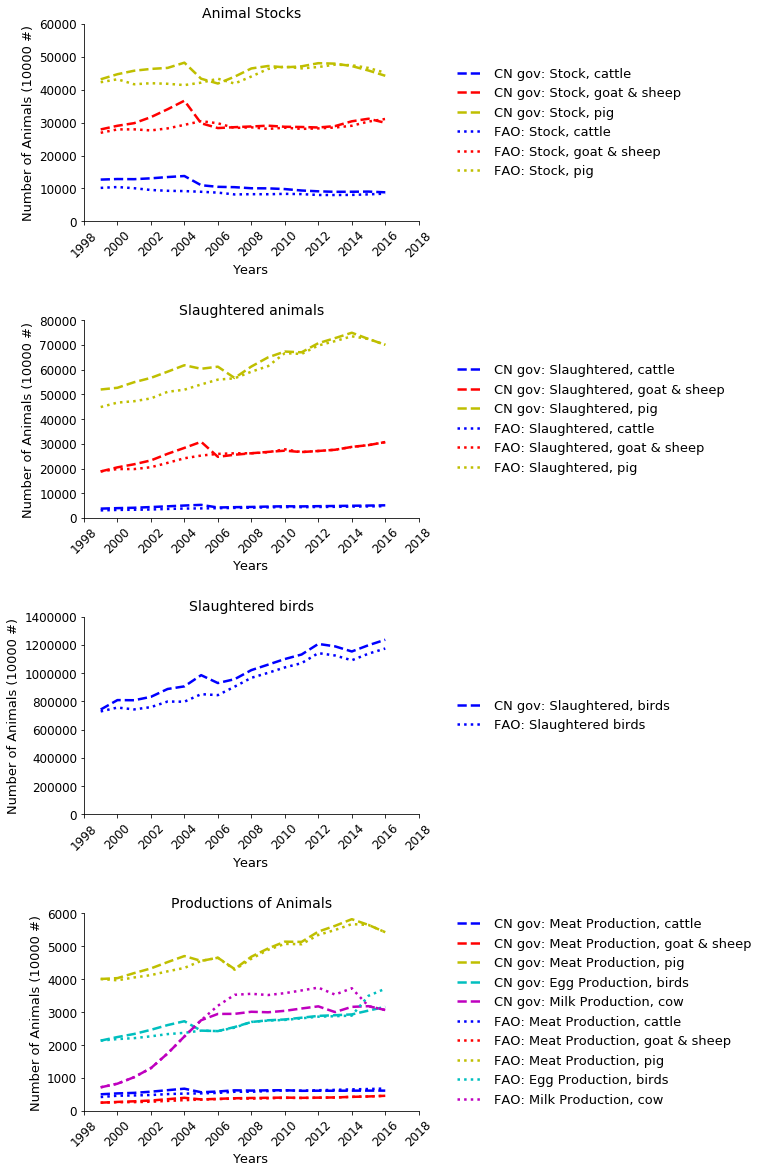

In [114]:
fig_size=(6,20)
fig = plt.figure(figsize = fig_size)
fig.tight_layout()                          
plt.subplots_adjust(wspace =0.3, hspace =0.5)

colors=('b','r','y','c','m','g')
ls1=('--','--','--','--','--','--','--') # gov
ls2=(':',':',':',':',':',':')            # fao

Xs = range(1998,2020,2)

def comparePlot(items):
    for i in range(0, len(items)):
        plt.plot(lvs_ars_cn['Year'], lvs_ars_cn[items[i]],c=colors[i],ls=ls1[i],lw=LIN_wei)
    for i in range(0, len(items)):
        plt.plot(lvs_cn_yrs['Year'], lvs_cn_yrs[items[i]],c=colors[i],ls=ls2[i],lw=LIN_wei)
    ax=plt.gca()
    setX_years(ax, Xs)
    setSpi_LB(ax)
#-------------------------------------------------------------------------------------------------
items = ('Stock, cattle','Stock, goat & sheep','Stock, pig')
ax0 = fig.add_subplot(4,1,1)
plt.title("Animal Stocks", fontsize=TIT_size)
comparePlot(items)
ax=plt.gca()
ax.legend(labels=['CN gov: Stock, cattle','CN gov: Stock, goat & sheep','CN gov: Stock, pig','FAO: Stock, cattle','FAO: Stock, goat & sheep','FAO: Stock, pig'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setY_num(ax, range(0, 70000, 10000))

items = ('Slaughtered, cattle','Slaughtered, goat & sheep','Slaughtered, pig')
ax1 = fig.add_subplot(4,1,2)
plt.title("Slaughtered animals", fontsize=TIT_size)
comparePlot(items)
'Slaughtered, cattle','Slaughtered, goat & sheep','Slaughtered, pig'
ax=plt.gca()
ax.legend(labels=['CN gov: Slaughtered, cattle','CN gov: Slaughtered, goat & sheep','CN gov: Slaughtered, pig', 'FAO: Slaughtered, cattle','FAO: Slaughtered, goat & sheep','FAO: Slaughtered, pig'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setY_num(ax, range(0, 90000, 10000))

ax2 = fig.add_subplot(4,1,3)
plt.title("Slaughtered birds", fontsize=TIT_size)
plt.plot(lvs_ars_cn['Year'], lvs_ars_cn['Slaughtered, birds'],c=colors[0],ls=ls1[0],lw=LIN_wei)
plt.plot(lvs_cn_yrs['Year'], lvs_cn_yrs['Slaughtered, birds'],c=colors[0],ls=ls2[0],lw=LIN_wei)
ax=plt.gca()
ax.legend(labels=['CN gov: Slaughtered, birds','FAO: Slaughtered birds'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setSpi_LB(ax)
setX_years(ax, Xs)
setY_num(ax, range(0, 1600000, 200000))

items = ('Meat Production, cattle','Meat Production, goat & sheep','Meat Production, pig','Egg Production, birds','Milk Production, cow')
ax3 = fig.add_subplot(4,1,4)
plt.title("Productions of Animals", fontsize=TIT_size)
comparePlot(items)
ax=plt.gca()
ax.legend(labels=['CN gov: Meat Production, cattle','CN gov: Meat Production, goat & sheep','CN gov: Meat Production, pig','CN gov: Egg Production, birds','CN gov: Milk Production, cow',
                  'FAO: Meat Production, cattle','FAO: Meat Production, goat & sheep','FAO: Meat Production, pig','FAO: Egg Production, birds','FAO: Milk Production, cow'],
          loc='center left', frameon=False, fontsize=LEG_size,
          bbox_to_anchor=(1.1,0.5),borderaxespad = 0.)
setY_num(ax, range(0, 7000, 1000))

plt.show()

Despite the milk data between 2005 and 2015 where the milk data from FAO is slightly higher then Chinese government, other datas are very close, and fluctuation are always happen in the same time , while FAO's data is more complete than Chinese government and has a better explanation, so we ues FAO's data as China's national data, as to different areas in China, we use Chinese government's data. 

In [115]:
### Calculate the Mean Value between FAO and Chinese Government Datas
# cols = lvs_ars.columns.tolist()
# df_temp = pd.DataFrame(columns=cols)
# df_temp['Area']=lvs_cn_yrs['Area']
# df_temp['Year']=lvs_cn_yrs['Year']
# cols.remove('Area')
# cols.remove('Year')
# for col in cols:
#         df_temp[col]=(lvs_cn_yrs[col]+lvs_ars_cn[col])/2

# display(lvs_cn_yrs.describe())
# display(lvs_ars_cn.describe())
# display(df_temp.describe())

### Merge Land Animals Datas from FAO and Chinese Government

Get the data from FAO before 1999, and in 2017, and drop China's national data from Chinese government's data, and then merge the data.
Finally, fill the null back with fao's data in year 1999 to 2016 where the data is removed when calculating mean values for the lacking of data from Chinese government.

In [116]:
cols=lvs_cn.columns.tolist()
df_fao= lvs_cn[lvs_cn['Year'].isin(range(1961,data_year))]
df_gov=lvs_ars[~lvs_ars['Area'].isin(['China, mainland'])]

df = pd.concat([df_fao, df_gov], join='outer', ignore_index=True, sort=False)

In [117]:
# display(df_fao.head())
# display(df_fao.tail())
# display(df_gov.head())
# display(df_gov.tail())
# display(df[df['Area'].isin(['China, mainland'])].head())
# display(df[df['Area'].isin(['China, mainland'])].tail())
# display(df[~df['Area'].isin(['China, mainland'])].head())
# display(df[~df['Area'].isin(['China, mainland'])].tail())

In [118]:
### if had Calculated the Mean Value between FAO and Chinese Government Datas, fill these data back
# items=['Stock_birds', 'MeatProd_birds', 'MeatYield_cattle', 'MeatYield_gt_shp', 'MeatYield_pig', 'MeatYield_birds']
# years = range(1999,2017)

# for y in years:
#     for i in items:
#         df.loc[(df['Area']=='China, mainland') & (df['Year']==y), i] = lvs_cn.loc[lvs_cn['Year']==y, i].values[0]

In [119]:
df.to_csv('./data/'+'product'+'_temp.csv', index=False)

### Merge Aquatic Data to Land Animals' Data

In [122]:
aqu = pd.read_csv('./data/'+'product_aquatic'+'_temp.csv')
df = pd.read_csv('./data/'+'product'+'_temp.csv')

df = pd.merge(df,aqu,how='outer',on=('Area','Year'))

print(df.shape)
display(df.loc[df['Area']=='China, mainland'].head())
display(df.tail())

(677, 37)


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
0,"China, mainland",1961,4940.0,11281.0,8227.0,62600.0,50.6,1000.0,3300.0,54500.0,4.3,10.0,137.0,57.00,150.0,60.0,85.0,10.000000,41.5,1.045872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"China, mainland",1962,4676.0,12387.0,7552.0,64200.0,69.0,1000.0,4300.0,56400.0,6.2,10.0,178.0,59.00,152.0,62.0,89.9,10.000000,41.4,1.046099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"China, mainland",1963,4736.0,13465.0,9997.0,66300.0,92.5,1200.0,7800.0,58000.0,8.3,12.0,330.0,60.75,154.0,63.5,89.7,10.000000,42.3,1.047414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"China, mainland",1964,4894.0,13747.0,13180.0,68400.0,103.5,1400.0,10500.0,59400.0,9.3,14.0,450.0,62.25,158.0,64.0,89.9,10.000000,42.9,1.047980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"China, mainland",1965,5242.0,13669.0,15247.0,69000.0,116.0,1570.0,12167.0,61600.0,10.4,16.0,525.0,64.50,162.0,64.5,89.7,10.191083,43.1,1.047078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
672,Gansu,2017,424.311515,1839.887280,551.320000,NaN,NaN,NaN,682.730000,NaN,20.961000,22.758000,49.882000,NaN,13.830500,40.400000,NaN,NaN,NaN,NaN,1.5441,1.5441,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5441,0.0000,1.5441,1.5355,0.0063,0.0000,0.0023
673,Qinghai,2017,546.560000,1387.410000,82.680000,NaN,NaN,NaN,110.630000,NaN,12.860000,12.680000,8.670000,NaN,2.460000,32.427941,NaN,NaN,NaN,NaN,1.6073,1.6073,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6073,0.0000,1.6073,1.5959,0.0114,0.0000,0.0000
674,Ningxia,2017,118.333400,506.589363,81.035057,NaN,NaN,NaN,113.745445,NaN,10.917891,9.906033,8.907976,NaN,15.271177,160.065904,NaN,NaN,NaN,NaN,18.0889,18.0889,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18.0889,0.0429,18.0460,17.9409,0.1450,0.0000,0.0030
675,Xinjiang,2017,432.988327,4317.919646,342.682280,NaN,NaN,NaN,495.765348,NaN,43.040014,58.241447,35.802410,NaN,37.373828,191.860000,NaN,NaN,NaN,NaN,16.5528,16.5528,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,16.5528,1.2723,15.2805,16.2333,0.2988,0.0065,0.0142
676,"China, mainland",2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6445.3279,6220.5465,3321.7376,1321.0403,2000.6973,1115.7752,370.7149,1481.4194,224.7814,129.0467,3123.5903,218.2973,2905.2930,2702.5521,320.7866,46.6675,53.5841


## Estimating Some Missing Values of Areas' Data

- **For cattle, goat & sheep, and pig Unit Meat Yilds in China's areas:**

    - *'Meat Yield, cattle' = 'Meat Production, cattle' / 'Slaughtered, cattle'*
    - *'Meat Yield, goat & sheep' = 'Meat Production, goat & sheep' / 'Slaughtered, goat & sheep'*
    - *'Meat Yield, pig' = 'Meat Production, pig' / 'Slaughtered, pig'*


- **For birds' unit meat yields, meat productions and stocks in China's Area:**

    - Birds Unit Meat Yilds in China's areas:

    Lacking of Meat 'Production, birds' and 'Slaughtered, birds', 'Meat Yield, birds' can be replaced with the national data in the same year.
    
    - Birds Meat Productions:
    
    *'Meat Production, birds' = 'Meat Yield, birds' * 'Slaughtered, birds'*
    
    - Birds Stocks:
    
    *(each year's 'Slaughtered, birds' of cn / each year's 'Stock, birds' of cn) = ('Slaughtered, birds' in areas of same year / 'Stock, birds' in areas of same year)*
    
    

In [123]:
df_ars=df[~df['Area'].isin(['China, mainland'])]
df_ars['Meat Yield, cattle'] = df_ars['Meat Production, cattle']/df_ars['Slaughtered, cattle']*1000 # tonnes/An to kg/An
df_ars['Meat Yield, goat & sheep' ] = df_ars['Meat Production, goat & sheep']/df_ars['Slaughtered, goat & sheep']*1000 
df_ars['Meat Yield, pig'] = df_ars['Meat Production, pig']/df_ars['Slaughtered, pig']*1000

Years = range(1999,2007)
for y in years:
    df_ars.loc[df_ars['Year']==y, 'Meat Yield, birds'] = df.loc[(df['Area']=='China, mainland') & (df['Year']==y), 'Meat Yield, birds'].values[0]
    df_ars.loc[df_ars['Year']==y, 'St/Sl, birds, est'] = df.loc[(df['Area']=='China, mainland') & (df['Year']==y), 'Stock, birds'].values[0] \
                                                       / df.loc[(df['Area']=='China, mainland') & (df['Year']==y), 'Slaughtered, birds'].values[0]
    
df_ars['Meat Production, birds'] = df_ars['Slaughtered, birds'] * df_ars['Meat Yield, birds']
df_ars['Stock, birds'] = df_ars['St/Sl, birds, est'] * df['Slaughtered, birds']

df_ars.drop(columns=(['St/Sl, birds, est']), inplace=True)
display(df_ars[df_ars['Year']==1999].head())

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Area,Year,"Stock, cattle","Stock, goat & sheep","Stock, pig","Stock, birds","Slaughtered, cattle","Slaughtered, goat & sheep","Slaughtered, pig","Slaughtered, birds","Meat Production, cattle","Meat Production, goat & sheep","Meat Production, pig","Meat Production, birds","Egg Production, birds","Milk Production, cow","Meat Yield, cattle","Meat Yield, goat & sheep","Meat Yield, pig","Meat Yield, birds","Aquatic, total","Aquatic, animals","Marine, total","Marine, caught","Marine, farmed",Marine Fish,Marine Crustaceans,Marine Molluscs,Marine Plants,"Marine, others","Freshwater, total","Freshwater, caught","Freshwater, farmed",Freshwater Fish,Freshwater Crustaceans,Freshwater Molluscs,"Freshwater, others"
87,Beijing,1999,13.6,103.1,248.3,5725.555784,13.50,88.20,400.9,10850.30,2.4,1.3,28.6,13794.871546,15.8,24.0,177.777778,14.739229,71.339486,1.271382,7.56,7.56,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,7.56,0.00,7.56,7.54,0.02,0.00,0.00
88,Tianjin,1999,18.8,56.9,127.0,1514.602453,17.68,81.32,198.4,2870.27,2.5,1.7,14.6,3649.208405,25.1,12.9,141.402715,20.905066,73.588710,1.271382,23.03,23.03,3.75,3.41,0.34,1.00,1.34,1.36,0.0,0.05,19.29,1.69,17.59,18.74,0.30,0.25,0.00
89,Hebei,1999,693.9,2063.5,2372.8,26668.780085,406.61,1781.38,3000.2,50539.07,61.9,23.4,226.5,64254.442615,338.6,68.4,152.234328,13.135883,75.494967,1.271382,75.96,75.96,42.34,32.83,9.51,18.04,8.43,12.80,0.0,3.07,33.61,6.64,26.98,31.65,1.54,0.32,0.11
90,Shanxi,1999,224.9,1016.0,502.2,1544.020970,52.00,446.79,570.2,2926.02,7.0,6.4,43.8,3720.087928,37.8,30.2,134.615385,14.324403,76.815153,1.271382,2.54,2.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.54,0.03,2.51,2.54,0.00,0.00,0.00
91,Neimenggu,1999,379.7,3702.6,777.6,2327.788309,129.10,1948.39,869.1,4411.31,17.8,29.8,80.5,5608.458273,23.5,67.9,137.877614,15.294679,92.624554,1.271382,6.86,6.86,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,6.86,2.75,4.10,6.66,0.18,0.00,0.01


## Save Clean Data and Delete Temp Data

In [124]:
df.to_csv('./data/product_clean.csv', index=False)

In [125]:
fls = os.listdir('./data/')
for f in fls:
    if 'temp' in f:
        ReadData('./data/'+f).delFile()